# Load cleaned Topography

## Call from HDD

In [1]:
import numpy as np
import pandas as pd
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')

## Manually defined parameter

In [2]:
colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
nms = ['78K(1)', '118K', '110K', '115K','78K(2)']
Ts = [78, 118, 110, 115,78]
nano = [160,40,80,40,80]
sz = [2048,512,1024,1024,2048]
pxl20nms = [int((sz[idt] / nano[idt]) * 20) for idt in range(len(fns))]
cntrs = [np.array(arrSries[fn].shape)//2 for fn in fns]


In [3]:
df = pd.DataFrame({
    'fns': fns,
    'colors': colors,
    'nms': nms,
    'Ts': Ts,
    'nano': nano,
    'sz': sz
    ,'pxl20nm': pxl20nms
    ,'cntrs': cntrs
})
df

,fns,colors,nms,Ts,nano,sz,pxl20nm,cntrs
0,2HTaSe2_bad_78K097,#9467bd,78K(1),78,160,2048,256,"[1024, 1024]"
1,2HTaSe2_ap_118K002,#1f77b4,118K,118,40,512,256,"[256, 256]"
2,2HTaSe2_bae_110K012,#ff7f0e,110K,110,80,1024,256,"[512, 512]"
3,2HTaSe2_ao_115K037,#2ca02c,115K,115,40,1024,512,"[512, 512]"
4,test,#d62728,78K(2),78,80,2048,512,"[1024, 1024]"


# Topography

In [4]:
from useful import *
tab = subtabSr(arrSries)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


## Topography:large,tab

Text(0.5, 0.98, '2H-TaSe2 STM topography by temperature')

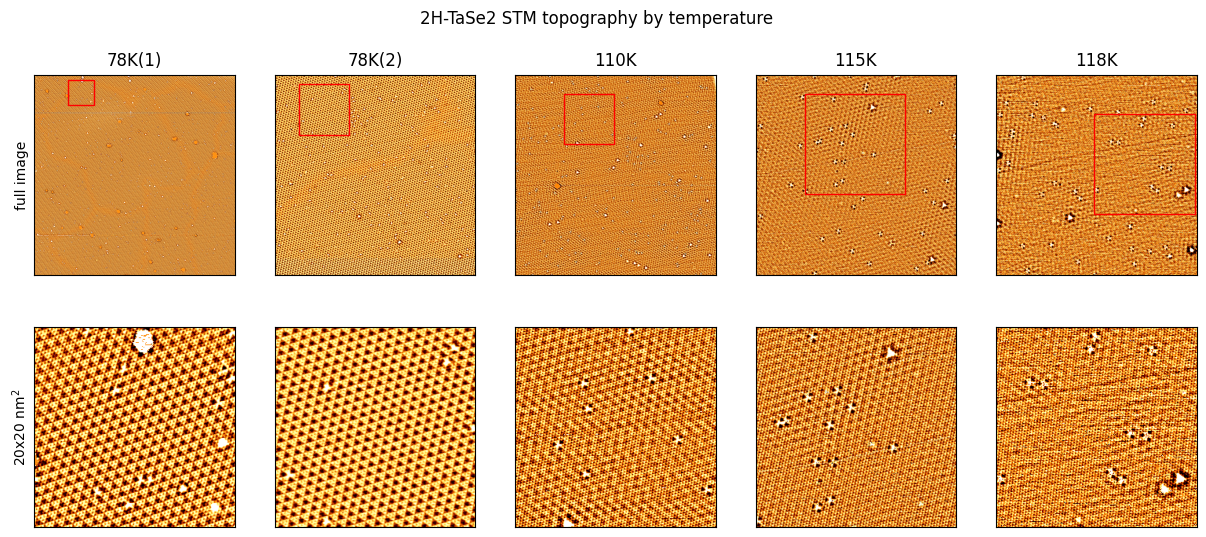

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
idts = [0,4,2,3,1]
x0, y0 = 250, 100
x0_, y0_ = 350, 50
x0s = [x0_,x0,x0,x0,x0]
y0s = [y0_,y0,y0,y0,y0]

fig,axs = plt.subplots(2,5,figsize=(15,6))
for idt,isb,x0,y0 in zip(idts,range(len(idts)),x0s,y0s):
    ax = axs[0,isb]
    plt.sca(ax)    
    arr = arrSries[fns[idt]]
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()
    ax.set_title(df['nms'][idt])
    pxl20nm = int((sz[idt]/nano[idt]) *20)
    if isb == 0:
        ax.set_ylabel('full image')
    
    ax = axs[1,isb]
    plt.sca(ax)    
    plt.imshow(arr,cmap='afmhot')
    auto199()
    tickoff()    
    ax.set_xlim(x0,pxl20nm+x0)
    ax.set_ylim(pxl20nm+y0,y0)
    # ax.
    if isb == 0:
        ax.set_ylabel('20x20 nm$^2$')
from matplotlib.patches import Rectangle
for idt, isb, x0, y0 in zip(idts, range(len(idts)), x0s, y0s):
    ax = axs[0, isb]
    pxl20nm = int((sz[idt] / nano[idt]) * 20)
    rect = Rectangle((x0, y0), pxl20nm, pxl20nm, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.suptitle('2H-TaSe2 STM topography by temperature')
# To see the result, you need to execute the next cell (12) to create the plot first,
# and then come back and execute this cell.
# The figure object `fig` needs to be displayed to see the changes.
# fig

# FFT

## manual define peak

### fcns

In [7]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [8]:
# from scipy.fft import fft2, fftshift
# from skimage.feature import peak_local_max
# def fft2show(arr_cln,vmin,vmax):
#   fft_result = fft2(arr_cln)
#   fft_result_shifted = fftshift(fft_result)
#   magnitude_spectrum = np.abs(fft_result_shifted)
#   plt.figure(figsize=(10, 10))
#   plt.imshow(magnitude_spectrum, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.title('Magnitude Spectrum of 2D FFT')
#   return  magnitude_spectrum

# def fft2pkfnd(fft2abs,threshold,choose):
#   coordinates = peak_local_max(fft2abs, min_distance=100, threshold_abs = threshold)
#   plt.scatter(coordinates[:, 1], coordinates[:, 0], s=50, facecolors='none', edgecolors='r')
#   for ipeak in range(coordinates.shape[0]):
#     plt.text(coordinates[ipeak,1],coordinates[ipeak,0],str(ipeak), color='g')
#   coordinates_choose = coordinates[choose,:]
#   print(coordinates_choose)
#   print(coordinates_choose.shape[0])
#   for ipeak in range(coordinates_choose.shape[0]):
#     plt.text(coordinates_choose[ipeak,1],coordinates_choose[ipeak,0],str(ipeak), color='b',size= 20)
#     pk_all = coordinates - (np.array(fft2abs.shape)/2)
#     pk_choose = pk_all[choose,:]
#   return pk_choose,pk_all

# def get_magnitude_spectrum(arr_cln):
#   fft_result = fft2(arr_cln)
#   fft_result_shifted = fftshift(fft_result)
#   magnitude_spectrum = np.abs(fft_result_shifted)
#   return magnitude_spectrum

In [9]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [10]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

In [11]:
%matplotlib inline
arrsz =[]
ffts = []
pk_chooses = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    arrsz.append(arr_cln.shape)
    fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
    pk_chooses.append(pk_choose)
    ffts.append(plt.gcf()) 
    plt.close()
        

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


In [12]:
# %matplotlib qt
subtabs(ffts,fns)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Text(0.5, 1.0, '2D FFT magnitude spectrum of 2H-TaSe2 STM topography by temperature')

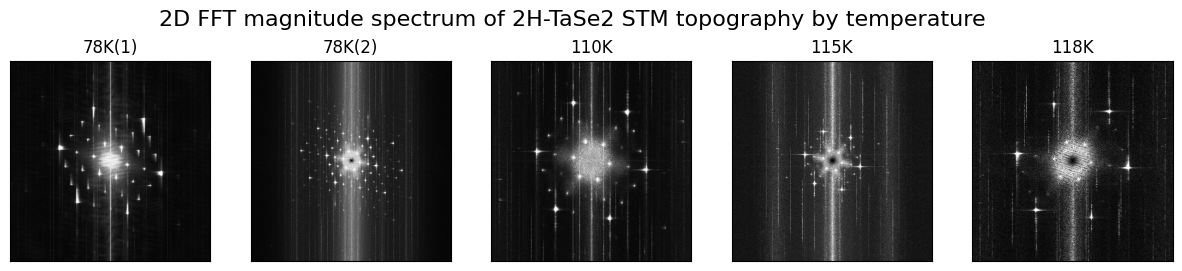

In [13]:
fig,axs = plt.subplots(1,5,figsize=(15,3))
for idt,isb in zip(idts,range(len(idts))):
    arr_cln = arrSries[fns[idt]]
    ms = imfft.get_magnitude_spectrum(arr_cln)
    axs[isb].imshow(ms,cmap='gray')
    plt.sca(axs[isb])
    axs[isb].set_title(nms[idt]) 
    auto199()
    tickoff()
plt.suptitle('2D FFT magnitude spectrum of 2H-TaSe2 STM topography by temperature',fontsize=16,y=1.)



## FFT profile

### fcns

In [14]:
scl = 1.2
atomPos = 1000
len_interp = int(atomPos*scl)+1#1201
# atomPos = int(1200/scl)
fft_pflss = []
# p1 = [0,0]
for idt in range(len(fns)):
    arr_cln = arrSries.iloc[idt]
    # fft_result = fft2(arr_cln)
    # fft2abs = fftshift(abs(fft2(arr_cln)))
    fft2abs = imfft.get_magnitude_spectrum(arr_cln)    
    fft_pfls = []
    sz = arrsz[idt]
    p1 = np.array([sz[0]//2,sz[1]//2])
    for of3 in range(3):            
        pk_choose = pk_chooses[idt][of3]        
        p2 = pk_choose*scl + p1
        fft_pfl = imfft.get_line_profile(fft2abs, p1, p2, len_interp)        
        fft_pfls.append(fft_pfl)
    fft_pflss.append(fft_pfls)
# plt.plot(foo)

In [15]:
x_atomUnit = np.linspace(0,scl,len_interp)

### plot all fft line profile

In [16]:
npmss = np.zeros((len(fns),3))

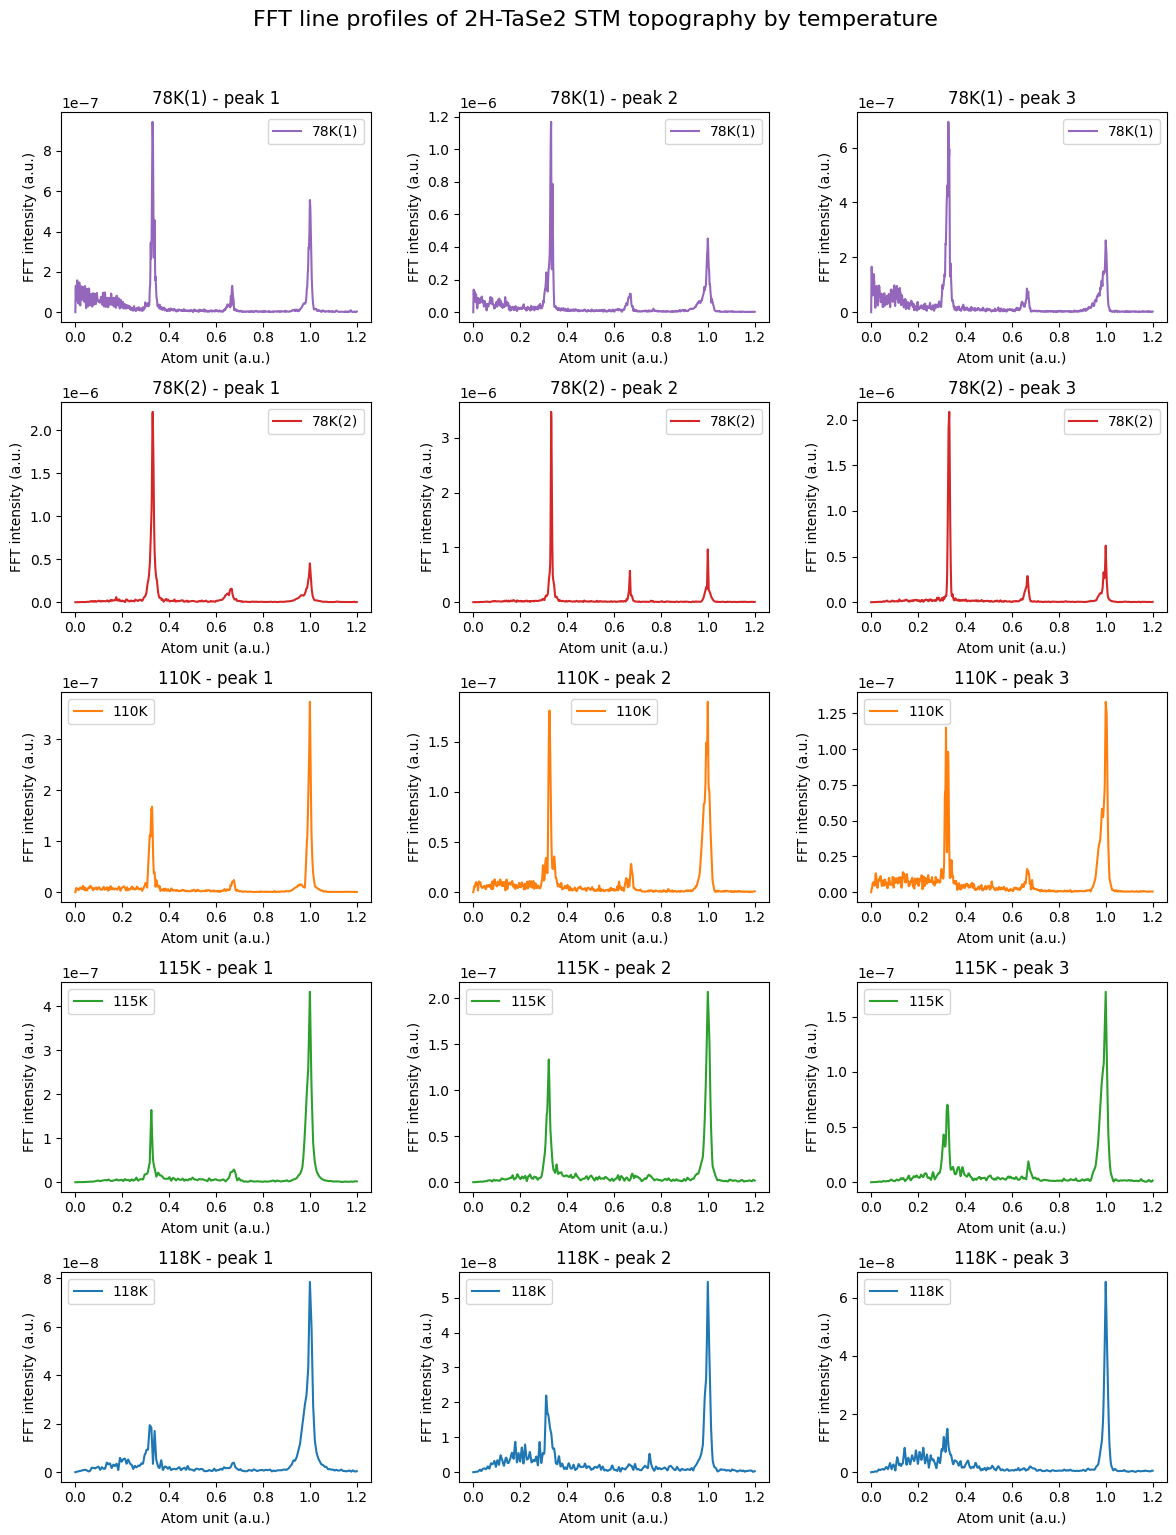

In [17]:
%matplotlib inline
vmin,vmax = 300,360
fig,axs = plt.subplots(5,3,figsize=(12,15))
# npamss=[] #argmax
# npmss =[] #max
npamss = np.zeros((len(fns),3)) #argmax
npmss = np.zeros((len(fns),3)) #max
for idt,isb in zip(idts,range(len(fns))):
    npams = []
    npms = []
    for of3 in range(3):
        fft_prof = fft_pflss[idt][of3]
        plt.sca(axs[isb,of3])            
        plt.plot(x_atomUnit,fft_prof,color=colors[idt],label=nms[idt])
        npam = np.argmax(fft_prof[vmin:vmax]) + vmin
        npm = np.max(fft_prof[vmin:vmax])/fft_prof[atomPos]
        npamss[idt,of3] = npam
        npmss[idt,of3] = npm
        # axs[idt,of3].plot(npam,npm,'o',color=colors[idt])     
        plt.legend()
        plt.title(f'{nms[idt]} - peak {of3+1}')
        npams.append(npam)
        npms.append(npm)
        plt.xlabel('Atom unit (a.u.)')
        plt.ylabel('FFT intensity (a.u.)')
    # npamss.append(npams)
    # npmss.append(npms)
plt.suptitle('FFT line profiles of 2H-TaSe2 STM topography by temperature',fontsize=16,y=1.02)    
plt.tight_layout()

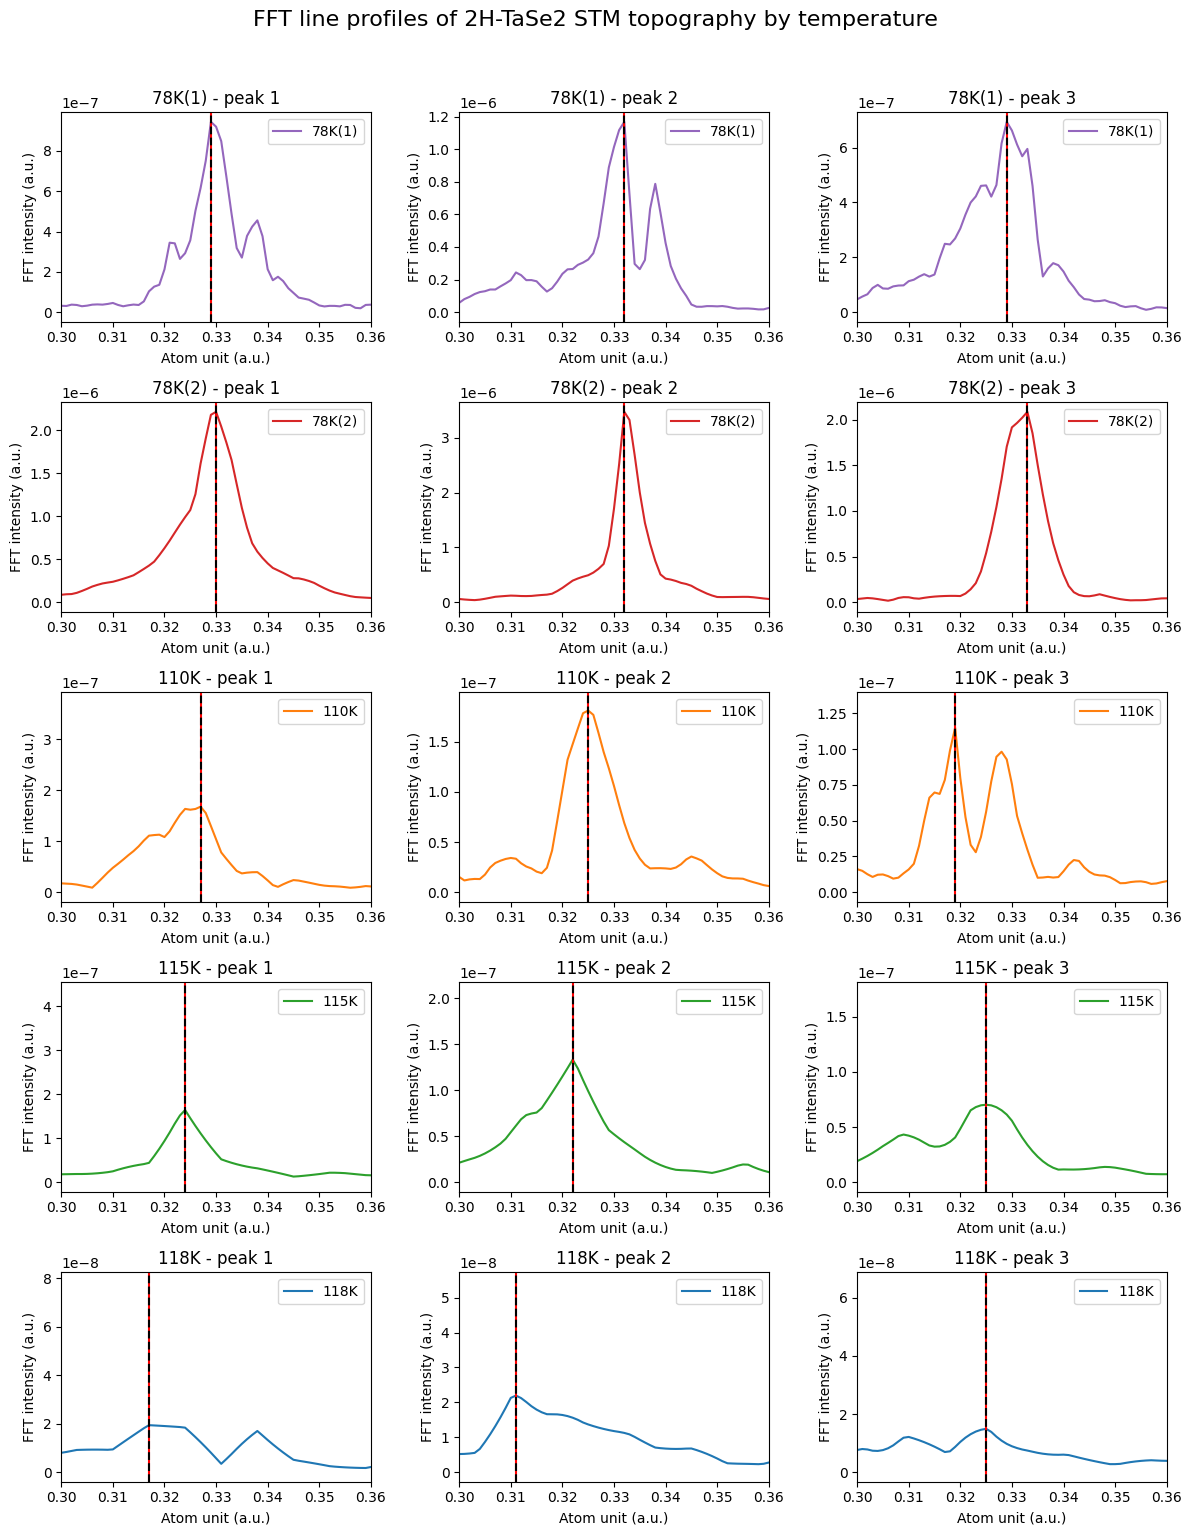

In [18]:
fig
for idt,isb in zip(idts,range(len(fns))):
    for of3 in range(3):
        plt.sca(axs[isb,of3])
        plt.xlim(.3,.36)
        plt.axvline(x_atomUnit[int(npamss[idt,of3])],color='r',linestyle='-')
        plt.axvline(x_atomUnit[int(npamss[idt,of3])],color='k',linestyle='--')
        
fig

### T vs CDW shift, intensity

Text(0.5, 1.02, 'Position and Intensity of CDW peaks')

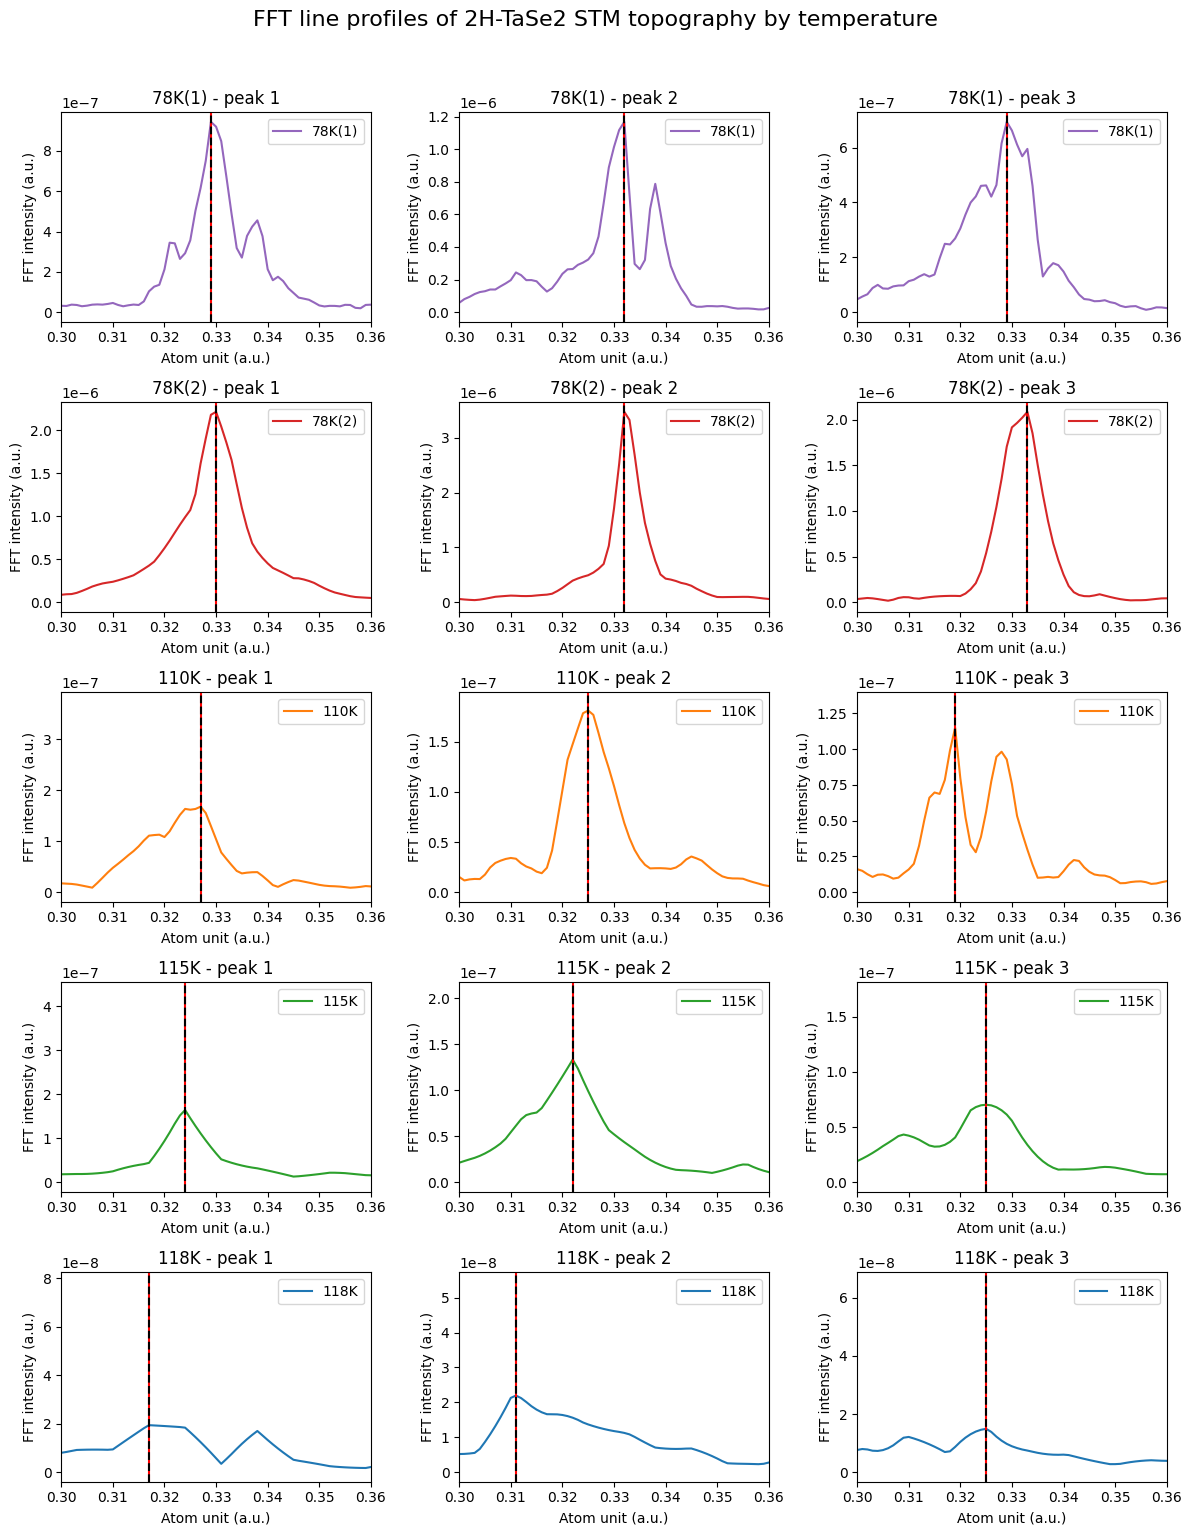

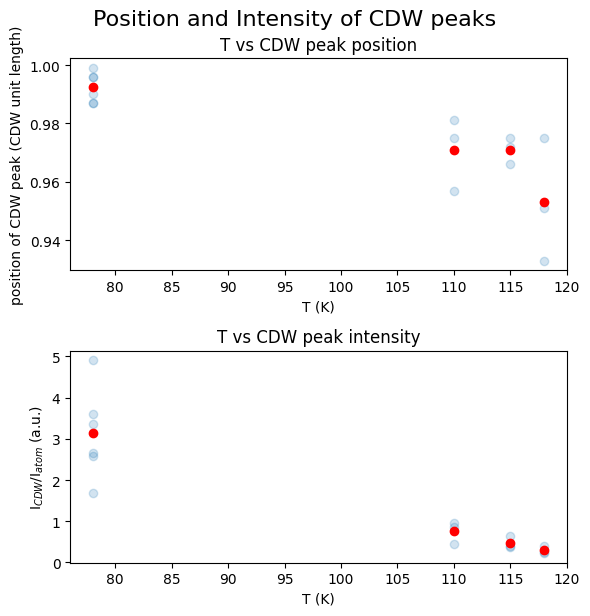

In [19]:
npamavg = np.array(npamss).mean(axis=1)
npmavg = np.array(npmss).mean(axis=1)
npamavT = [(npamavg[0]+npamavg[-1])/2,npamavg[1],npamavg[2],npamavg[3]]
npmavgT = [(npmavg[0]+npmavg[-1])/2,npmavg[1],npmavg[2],npmavg[3]]
xs =[]
ys = []
y2s = []
for idt in range(len(fns)):
    for of3 in range(3):
        xs.append(Ts[idt])
        ys.append(npamss[idt][of3])
        y2s.append(npmss[idt][of3])
ys = np.array(ys)/(1000/3)
# y2s = np.array(y2s)/(1000/3)
npamavT = np.array(npamavT)/(1000/3)


fig,axs = plt.subplots(2,1,figsize=(6,6))

plt.sca(axs[0]) 
plt.scatter(xs,ys,alpha=0.2)
plt.plot(Ts[:-1],npamavT,'ro')
plt.xlabel('T (K)')
plt.ylabel('position of CDW peak (CDW unit length)')
plt.title('T vs CDW peak position')

plt.sca(axs[1])
plt.scatter(xs,y2s,alpha=0.2)
plt.plot(Ts[:-1],npmavgT,'ro')
plt.xlabel('T (K)')
plt.ylabel('I$_{CDW}$/I$_{atom}$ (a.u.)')
plt.title('T vs CDW peak intensity')

plt.tight_layout()
plt.suptitle('Position and Intensity of CDW peaks',fontsize=16,y=1.02)

### T vs cdw peak intensity

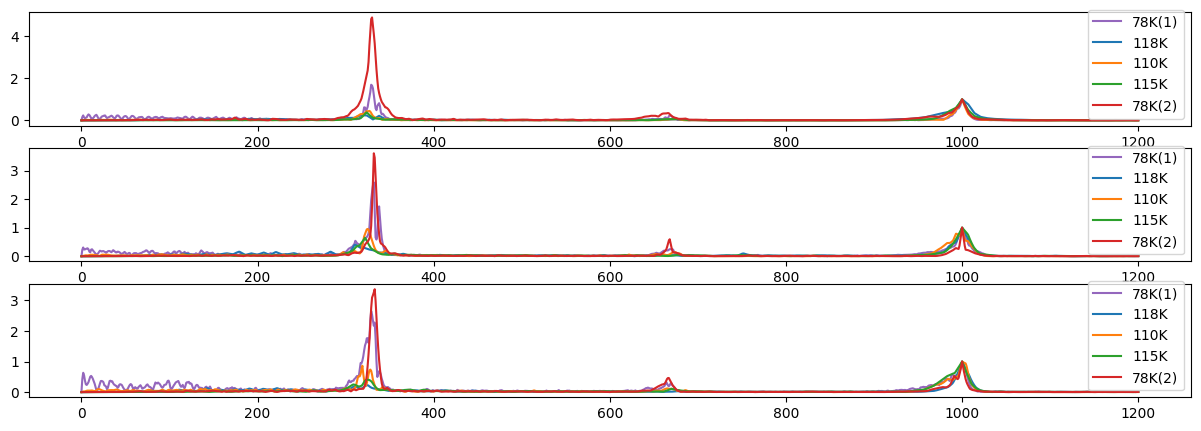

In [20]:
%matplotlib inline
fig,axs = plt.subplots(3,1,figsize=(15,5))
# for idt in range(len(fns)):

# atomPos = int(1200/(scl*3))
for of3 in range(3):
    for idt in range(len(fns)):
    # for idt in [0,1,2,3]:            
        fft_prof = fft_pflss[idt][of3]
        fft_prof_norm = fft_prof/fft_prof[atomPos]
        axs[of3].plot(fft_prof_norm,color=colors[idt],label=nms[idt])
        # axs[of3].set_xlim(300,360)
    # axs[idt,of3].plot(fft_pflss[idt][of3])
    # axs[idt,of3].set_title(fns[idt]+' pk#'+str(of3))
    axs[of3].legend()


np.float64(2.0840908887791467e-06)

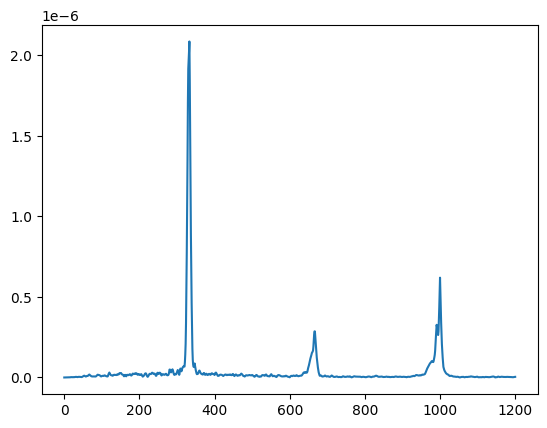

In [21]:
fft_prof = fft_pflss[idt][of3]
vmin,vmax = 300,360
plt.plot(fft_prof)
am = np.argmax(fft_prof[vmin:vmax]) + vmin
np.max(fft_prof[vmin:vmax])

# Autocorrelation

## 2d autocorrelation

In [22]:
import numpy as np



In [23]:
pxl20nms[0]

256

In [24]:
auto_corr_ffts = []
auto_corr_fft_figs= []
for ind in range(len(fns)):
    fn = fns[ind]
    arr = arrSries[fn]
    arr = arr - np.mean(arr)
    auto_corr_fft = imfft.autocorr2d_fft(arr)
    auto_corr_fft = auto_corr_fft / np.max(auto_corr_fft)
    auto_corr_ffts.append(auto_corr_fft)
    fig = plt.figure(figsize=(10,10))
    # plt.imshow(auto_corr_fft, cmap='gray')
    plt.imshow(auto_corr_fft,vmax=1,vmin=-1,cmap ='bwr')
    auto_corr_fft_figs.append(fig) 
    tickoff()
    cntr = np.array(arr.shape)/2
    plt.xlim(cntr[1]-50,cntr[1]+50)
    plt.ylim(cntr[0]-50,cntr[0]+50)
    plt.close()
    

In [25]:
subtabs(auto_corr_fft_figs,fns)

(206.0, 306.0)

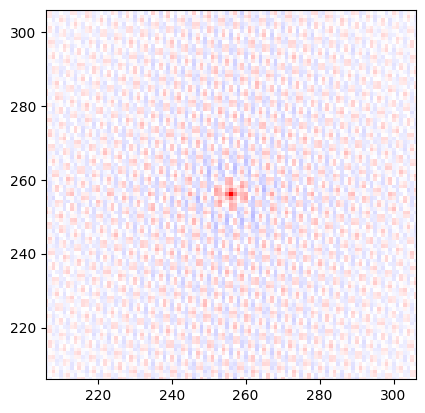

In [26]:
idt = 1
auto_corr_fft = auto_corr_ffts[idt]
plt.imshow(auto_corr_fft,vmax=1,vmin=-1,cmap ='bwr')
cntr = np.array(auto_corr_fft.shape)/2
pxl20nms[idt]
plt.xlim(cntr[1]-50,cntr[1]+50)
plt.ylim(cntr[0]-50,cntr[0]+50)

Text(0.5, 1, '2D Autocorrelation of 2H-TaSe2 STM topography by temperature')

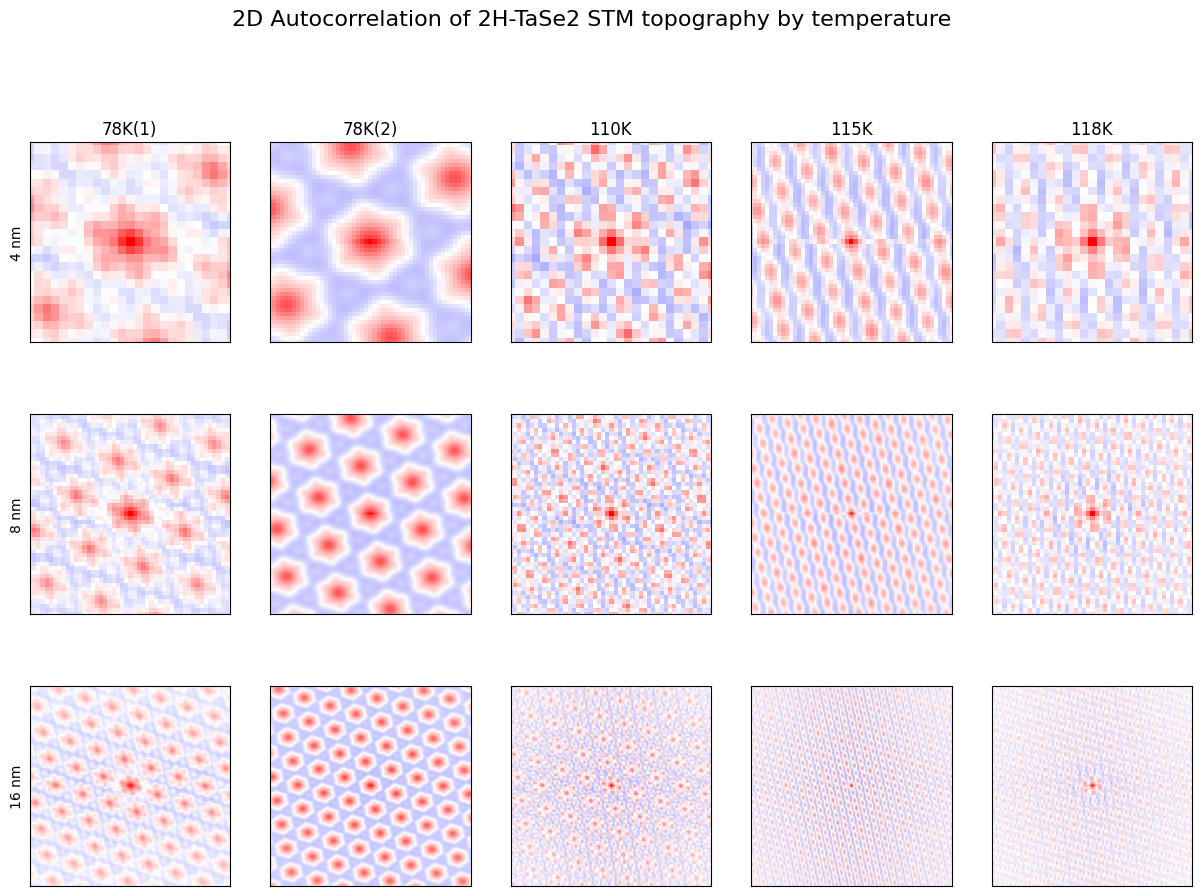

In [27]:
fig,axs = plt.subplots(3,5,figsize=(15,10))
for idt,isb in zip(idts,range(len(fns))):
    auto_corr_fft = auto_corr_ffts[idt]
    cntr = np.array(auto_corr_fft.shape)/2
    cropLenU = pxl20nms[idt]//20
    ratios =np.array([1,2,4]) 
    cropLens = np.array(ratios)*cropLenU
    winnanos = ratios*4
    for of3 in range(3):
        cropLen = cropLens[of3]        
        plt.sca(axs[of3,isb])
        plt.imshow(auto_corr_fft,vmax=1,vmin=-1,cmap ='bwr')                
        plt.xlim(cntr[1]-cropLen,cntr[1]+cropLen)
        plt.ylim(cntr[0]-cropLen,cntr[0]+cropLen)
        tickoff()
        if of3 == 0:
            axs[of3,isb].set_title(nms[idt])
        if isb == 0:
            axs[of3,isb].set_ylabel(f'{winnanos[of3]} nm')
plt.suptitle('2D Autocorrelation of 2H-TaSe2 STM topography by temperature',fontsize=16,y=1)
        



In [28]:
auto_corr_ffts[1].max()

np.float64(1.0)

## autocorr line profile

In [29]:
p2s =[
    [1038,962],
    [263,200],
    [521,457],
    [537,401],
    [1048,905]
    ]
longness = 2
for idx in range(len(fns)):
    auto_corr_fft = auto_corr_ffts[idx]
    p1 = np.array(auto_corr_fft.shape)/2
    p2 = p2s[idx][1],p2s[idx][0]
    p2 = np.array(p2)
    shift = p2 - p1
    p2 = p1 + shift*longness
    p2s[idx] = [p2[1],p2[0]]

In [30]:
# from scipy.ndimage import map_coordinates

# def line_profile(image, p1, p2,num_points=1000):
#     """
#     Get the line profile of a 2D image between two points p1 and p2.
    
#     Args:
#         image (np.ndarray): The 2D image.
#         p1 (tuple): The (y, x) coordinates of the start point.
#         p2 (tuple): The (y, x) coordinates of the end point.
        
#     Returns:
#         np.ndarray: The 1D array of intensity values along the line.
#     """
#     y1, x1 = p1
#     y2, x2 = p2
    
#     # Number of points in the line profile
#     # num_points = int(np.ceil(np.linalg.norm(np.array(p1) - np.array(p2))))
    
#     # Generate coordinates along the line
#     y_coords = np.linspace(y1, y2, num_points)
#     x_coords = np.linspace(x1, x2, num_points)
    
#     # `map_coordinates` expects coordinates in (ndim, n_points) format
#     coords = np.vstack((y_coords, x_coords))
    
#     # Interpolate the values from the image
#     profile = map_coordinates(image, coords, order=1)
    
#     return profile

In [31]:
fcs = [(200/longness)*i for i in range(5*longness+1)]
fcs[-1] = 999

In [32]:
fcs = list(map(int,fcs))

important data point

In [33]:
# def exp_func(x, a, b, c):
#     return a * np.exp(-b * x) + c
# initial_guess = [1.0, 0.01, 0.0]
# def exp_func(x, a, b):
#     return a * np.exp(-b * x)
# initial_guess = [1.0, 0.01]
def exp_func(x,  b):
    return np.exp(-b * x)
initial_guess = [0.01]

[4.7857373]
[1.60223558]
[1.47723446]
[0.54336656]


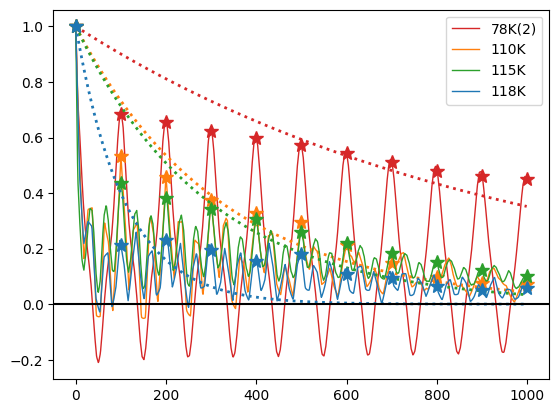

In [34]:
%matplotlib inline
from scipy.optimize import curve_fit
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# nms = ['78K', '118K', '110K', '115K','78K']
lps = []
lp2s = []
for idt in [4,2,3,1]:
    auto_corr_fft = auto_corr_ffts[idt]
    p1 = np.array(auto_corr_fft.shape)/2
    p2 = p2s[idt][1],p2s[idt][0]
    # p1 = 2*p1 - p2
    lp = imfft.get_line_profile(auto_corr_fft, p1, p2,num_points=1000)
    # lp = profile_line(auto_corr_fft, p1, p2,linewidth=5)
    lp = lp/np.max(lp)
    lps.append(lp)
    lp2 = lp[fcs]
    lp2s.append(lp2)
    popt, pcov = curve_fit(exp_func, np.array(fcs), lp2, p0=initial_guess)
    lp3 = exp_func(range(1000), *popt)
    plt.plot(lp,label=nms[idt],linewidth=1,color=colors[idt])
    plt.plot(fcs,lp2,'*',linewidth=2,color=colors[idt],markersize=10)
    plt.plot(lp3,':',linewidth=2,color=colors[idt])
    print(1/(popt*200))
# plt.vertical_line(0)
plt.legend()    
plt.axhline(0,color='k')

[4.7857373]
[1.60223558]
[1.47723446]
[0.54336656]


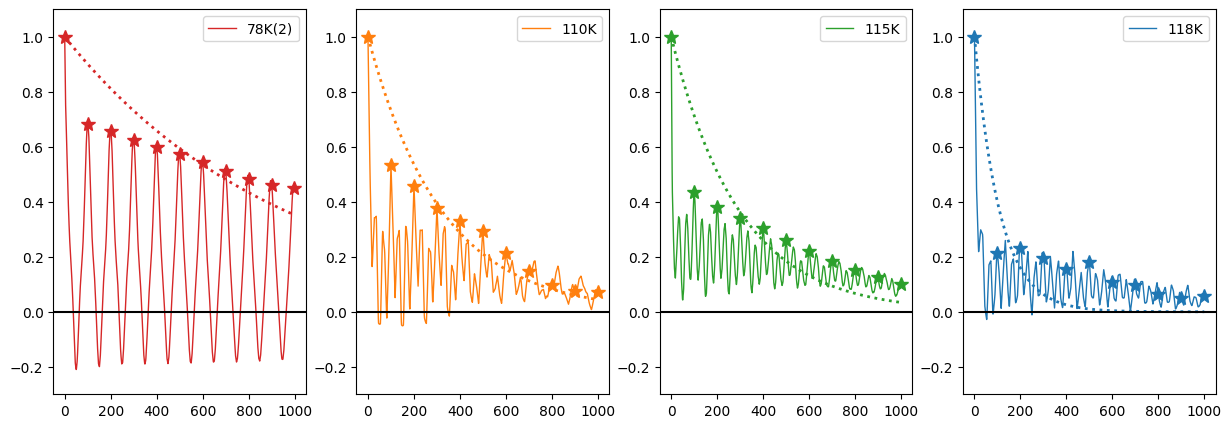

In [35]:
%matplotlib inline
from scipy.optimize import curve_fit
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# nms = ['78K', '118K', '110K', '115K','78K']
lps = []
lp2s = []
fig,axs = plt.subplots(1,4,figsize=(15,5))
for isb,idt in zip(range(4),[4,2,3,1]):
    plt.sca(axs[isb])
    auto_corr_fft = auto_corr_ffts[idt]
    p1 = np.array(auto_corr_fft.shape)/2
    p2 = p2s[idt][1],p2s[idt][0]
    # p1 = 2*p1 - p2
    lp = imfft.get_line_profile(auto_corr_fft, p1, p2,num_points=1000)
    # lp = profile_line(auto_corr_fft, p1, p2,linewidth=5)
    lp = lp/np.max(lp)
    lps.append(lp)
    lp2 = lp[fcs]
    lp2s.append(lp2)
    popt, pcov = curve_fit(exp_func, np.array(fcs), lp2, p0=initial_guess)
    lp3 = exp_func(range(1000), *popt)
    plt.plot(lp,label=nms[idt],linewidth=1,color=colors[idt])
    plt.plot(fcs,lp2,'*',linewidth=2,color=colors[idt],markersize=10)
    plt.plot(lp3,':',linewidth=2,color=colors[idt])
    print(1/(popt*200))
# plt.vertical_line(0)
    plt.legend()    
    plt.axhline(0,color='k')
    plt.ylim(-.3,1.1)